<a href="https://colab.research.google.com/github/hyojgun/hyojeong/blob/main/CNN%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170M/170M [00:08<00:00, 20.9MB/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


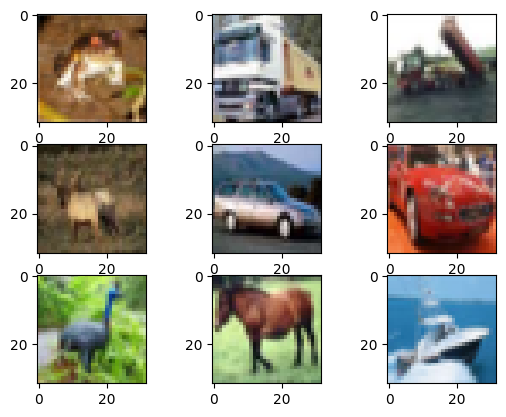

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=ToTensor()
)

for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(training_data.data[i])
plt.show()

Files already downloaded and verified
Files already downloaded and verified


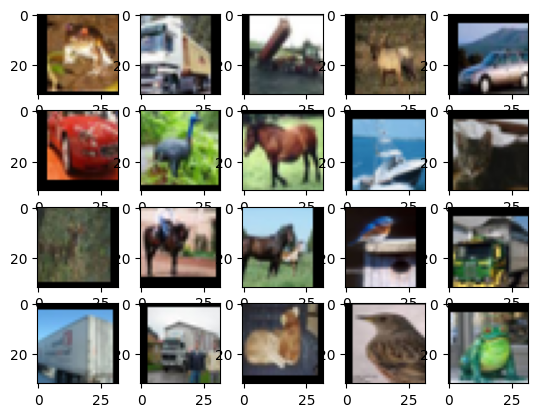

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop
from torchvision.transforms import ToTensor


# 데이터 전처리
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32,32), padding=4), # 랜덤으로 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p=0.5),  # y축 기준으로 대칭
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms
)

for i in range(20):
  plt.subplot(4, 5, i + 1)
  plt.imshow(transforms(training_data.data[i]))
plt.show()

Files already downloaded and verified
Files already downloaded and verified


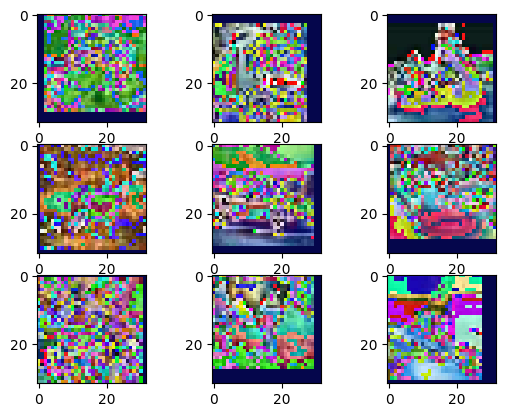

In [3]:
# 데이터 정규화 추가

import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize
from torchvision.transforms import ToTensor


# 데이터 전처리
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32,32), padding=4), # 랜덤으로 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p=0.5), # y축 기준으로 대칭
    T.ToTensor(),

    Normalize(mean=(0.4914,0.4822,0.4465), std=(0.247,0.243,0.261)),
              T.ToPILImage()
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms
)

for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(transforms(training_data.data[i]))
plt.show()

In [4]:
# CIFAR10 데이터셋의 평균과 표준편차 구하기
import torch

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor()
)

imgs = [item[0] for item in training_data]
imgs = torch.stack(imgs, dim=0).numpy()

mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print(mean_r, mean_g, mean_b)

std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(std_r, std_g, std_b)

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


Files already downloaded and verified


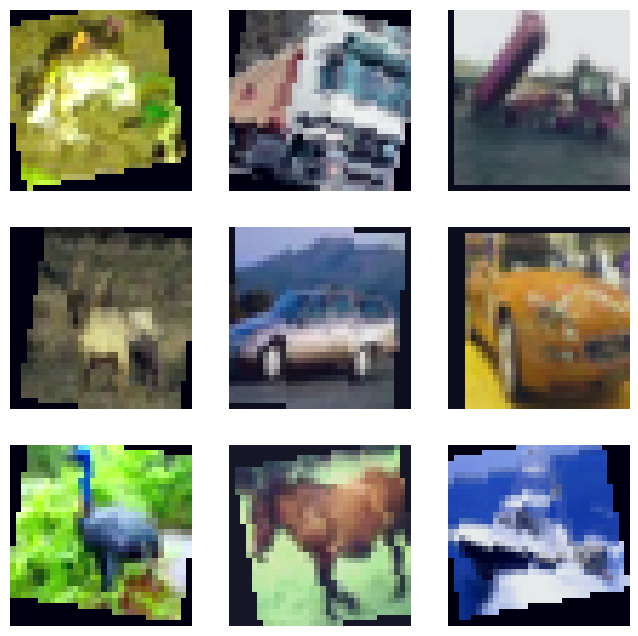

In [5]:
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, RandomHorizontalFlip, RandomCrop, Normalize, ToTensor, ColorJitter, RandomRotation

# 데이터 전처리
transforms = Compose([
    RandomCrop(32, padding=4),  # 일부 크롭 후 패딩
    RandomHorizontalFlip(p=0.5),  # 좌우 반전
    RandomRotation(15),  # 15도 범위에서 랜덤 회전
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 색상 조정
    ToTensor(),  # 텐서 변환
    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))  # 정규화
])

# CIFAR-10 데이터 로드
training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms
)

# 첫 9개 이미지 시각화
plt.figure(figsize=(8, 8))
for i in range(9):
    image, _ = training_data[i]  # CIFAR-10 데이터셋의 각 이미지와 라벨을 가져옴
    image = (image * 0.247 + 0.4914).clamp(0, 1)  # 정규화 역변환 (0~1 범위로 복구)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.permute(1, 2, 0))  # 이미지 채널 순서를 [H, W, C]로 변환
    plt.axis('off')
plt.show()


Files already downloaded and verified


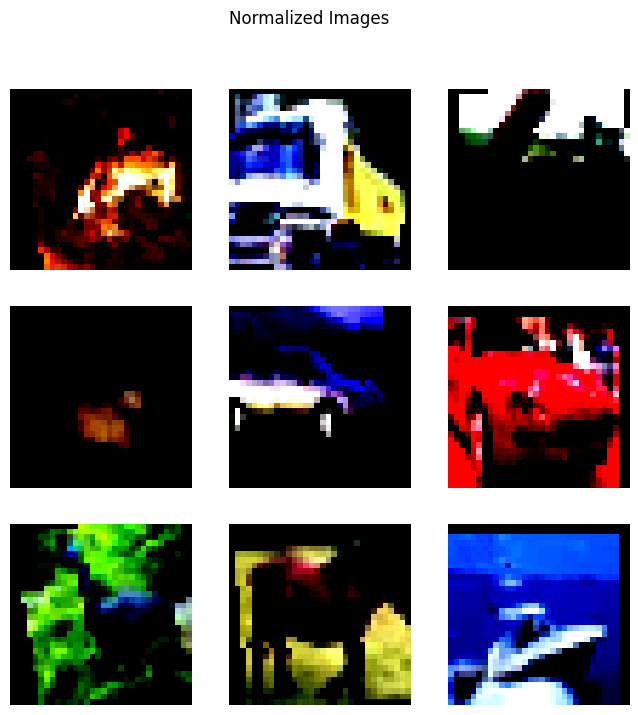

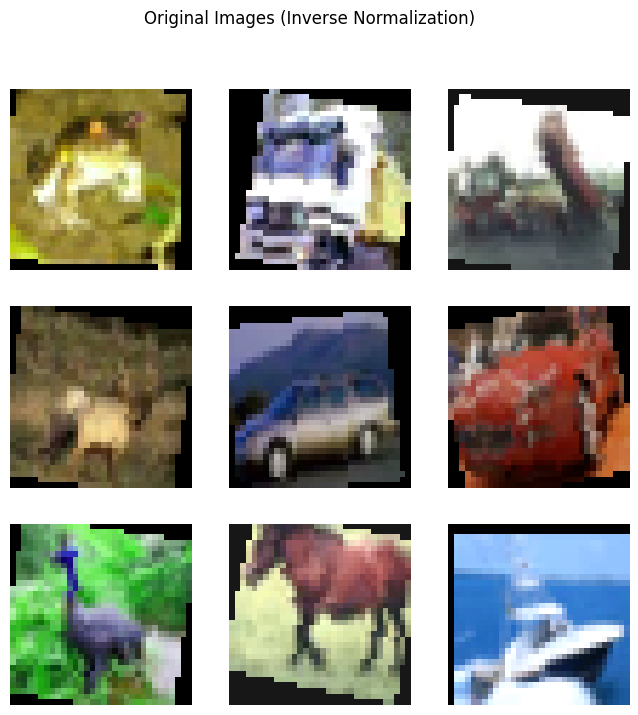

In [6]:
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, RandomHorizontalFlip, RandomCrop, Normalize, ToTensor, ColorJitter, RandomRotation

# 데이터 전처리
transforms = Compose([
    RandomCrop(32, padding=4),  # 일부 크롭 후 패딩
    RandomHorizontalFlip(p=0.5),  # 좌우 반전
    RandomRotation(15),  # 15도 범위에서 랜덤 회전
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 색상 조정
    ToTensor(),  # 텐서 변환
    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))  # 정규화
])

# CIFAR-10 데이터 로드
training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms
)

# 정규화된 이미지 시각화
plt.figure(figsize=(8, 8))
for i in range(9):
    image, _ = training_data[i]  # CIFAR-10 데이터셋의 각 이미지와 라벨을 가져옴
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.permute(1, 2, 0))  # 정규화된 이미지 출력
    plt.axis('off')
plt.suptitle("Normalized Images")
plt.show()

# 정규화 역변환을 통해 원래 이미지로 복원하고 시각화
plt.figure(figsize=(8, 8))
for i in range(9):
    image, _ = training_data[i]
    # 정규화 역변환
    image = image * torch.tensor([0.247, 0.243, 0.261]).view(3, 1, 1) + torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
    image = image.clamp(0, 1)  # 0~1 범위로 자르기
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.permute(1, 2, 0))  # 원래 이미지로 복원하여 출력
    plt.axis('off')
plt.suptitle("Original Images (Inverse Normalization)")
plt.show()


In [7]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_dim):
      super(BasicBlock, self).__init__()

      self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size=3, padding=1)
      self.conv2 = nn.Conv2d(hidden_dim, out_channels, kernel_size=3, padding=1)
      self.relu = nn.ReLU()

      self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self,x):
      x = self.conv1(x)
      x = self.relu(x)
      x = self.conv2(x)
      x = self.relu(x)
      x = self.pool(x)

      return x

In [8]:
class CNN(nn.Module):
  def __init__(self, num_classes): # num_classes 인수 추가
    super(CNN, self).__init__()

    # 합성공 기본 블록 정의
    self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16)
    self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64)
    self.block3 = BasicBlock(in_channels=128, out_channels=256, hidden_dim=128)

    # 분류기 정의
    self.fc1 = nn.Linear(in_features=4096,out_features=2048)
    self.fc2 = nn.Linear(in_features=2048, out_features= 256)
    self.fc3 = nn.Linear(in_features=256, out_features=num_classes) # num_classes 사용

    # 분류기 함수
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)
    x = torch.flatten(x, start_dim=1)

    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)


    return x

In [9]:
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam

transforms = Compose([
    RandomCrop((32,32), padding =4),
    RandomHorizontalFlip(p=0.5),
    ToTensor(),
    Normalize(mean=(0.4914,0.4822,0.4465), std=(0.247,0.243,0.261))
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms
)

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(num_classes=10)
model.to(device)

Files already downloaded and verified
Files already downloaded and verified


CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

In [10]:
lr = 1e-3

optim = Adam(model.parameters(), lr=lr)

for epoch in range(100):
  for data,label in train_loader:
    optim.zero_grad()

    preds = model(data.to(device))

    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()

    if epoch==0 or epoch%10 ==9:
      print(f"Epoch {epoch+1} loss: {loss.item()}")

torch.save(model.state_dict(), "cifar10_cnn.pth")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 70 loss: 0.4939576983451843
Epoch 70 loss: 0.5059925317764282
Epoch 70 loss: 0.38846224546432495
Epoch 70 loss: 0.4394948184490204
Epoch 70 loss: 0.30879315733909607
Epoch 70 loss: 0.49358871579170227
Epoch 70 loss: 0.4105512201786041
Epoch 70 loss: 0.45225006341934204
Epoch 70 loss: 0.4422703981399536
Epoch 70 loss: 1.0077425241470337
Epoch 70 loss: 0.37114959955215454
Epoch 70 loss: 0.5197327136993408
Epoch 70 loss: 0.16062873601913452
Epoch 70 loss: 0.3358452320098877
Epoch 70 loss: 0.25820624828338623
Epoch 70 loss: 0.5591310262680054
Epoch 70 loss: 0.7346523404121399
Epoch 70 loss: 0.3736671507358551
Epoch 70 loss: 0.3930513858795166
Epoch 70 loss: 0.18560075759887695
Epoch 70 loss: 0.4187988340854645
Epoch 70 loss: 0.3502521514892578
Epoch 70 loss: 0.3209904730319977
Epoch 70 loss: 0.31116780638694763
Epoch 70 loss: 0.15070271492004395
Epoch 70 loss: 0.5545748472213745
Epoch 70 loss: 0.4502755403518677
Epoch 70 loss: 0.17512434720993042
E

In [13]:
model.load_state_dict(torch.load("cifar10_cnn.pth", map_location=device))

num_corr = 0

with torch.no_grad():
  for data, label in test_loader:

    output = model(data.to(device))
    preds = output.data.max(1)[1]
    corr = preds.eq(label.to(device).data).sum().item()
    num_corr += corr

  print(f"Accuracy: {num_corr/len(test_data)}")

<ipython-input-13-e56c9a713cb2>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("cifar10_cnn.pth", map_location=device))


Accuracy: 0.8402
